This python notebook has the coding pertaining to Lending Club Case Study - submitted as part of "Statistics Essentials" course

Student Name - Rohit Kotikanyadanam Anand
Application ID : APFE21706779 

# Initializing libraries

Initializing all the libraries for the EDA analysis as part of the case study.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

Below code is to read the file in Google Collab, in case we use this file in Jupyter note book, we can directly use the pd.read_csv code.

In [ ]:
from google.colab import files
uploaded = files.upload()
import io

Saving loan.csv to loan.csv


In [4]:
df2 = pd.read_csv('D:\Document\Python Data\Lending Case Study\loan.csv')

# Basic Analysis - Understanding the Data

Perform basic data check

1.   DataFrame information
2.   Sample DataFrame view
3.   Check the Data types of the DataFrame



In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [30]:
df2.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [31]:
df2.dtypes
df2.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

# Data Cleaning

Checking Null, Rectifying the Data Types and Eliminating unwanted data

In [32]:
# Check Null/NA values in the DataFrame

df2.isnull().sum()

# There are many columns where the entire row is null

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# We will delete all the columns where we have Null values

df2 = df2.dropna(axis = 1, how = "all")

In [6]:
# Reveify if all the Null/NA value columns have been dropped or not
# We still see a lot of columns have significant Null/NA values, lets review them once

df2.isnull().sum()

# We will delete any columns which has more than 30% Null/NA Values

df2.dropna(axis = 1, thresh = 12000, inplace = True) 


In [7]:
# We still have Null/NA Columns left,Upon reviewing the "desc" column, it basically has journal entries.
# So, we will drop that column as well.

df2.drop("desc", axis = 1, inplace = True)


In [8]:
#Dropping another column with 25000+ Null/NA values

df2.drop("mths_since_last_delinq", axis = 1, inplace = True)


In [9]:
df2.isnull().sum() # Check the null value for left over Columns


id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [10]:
# Emp Title and Emp Length are both Null for 1019 Columns, so we cam assume are they have not worked and marked their 
# emp_title = "NA" and emp_length = 0 (signifying 0 years).

df2["emp_title"].fillna(value = "missing", inplace = True)
df2["emp_length"].fillna(value = 0, inplace = True)


In [11]:
# We are getting rid of any strings with the numeric values

df2["term"] = df2["term"].str.replace(" months" , "")
df2["int_rate"] = df2["int_rate"].str.replace("%" , "")
df2["emp_length"] = df2["emp_length"].str.replace("+" , "")
df2["emp_length"] = df2["emp_length"].str.replace(" years" , "")
df2["emp_length"] = df2["emp_length"].str.replace(" year" , "")
df2["emp_length"] = df2["emp_length"].str.replace("<" , "")
df2["emp_length"] = df2["emp_length"].str.replace(">" , "")
df2["revol_util"] = df2["revol_util"].str.replace("%" , "")

In [12]:
#Changing the datatype of below columns

df2["term"] = df2["term"].astype("int64")
df2["int_rate"] = df2["int_rate"].astype("float")
df2["emp_length"] = df2["emp_length"].astype("float")
df2["revol_util"] = df2["revol_util"].astype("float")


In [13]:
df2.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,38642.000000,3.971700e+04,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,5.092050,6.896893e+04,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,3.408338,6.379377e+04,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,1.000000,4.000000e+03,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,2.000000,4.040400e+04,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,4.000000,5.900000e+04,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,9.000000,8.230000e+04,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [14]:
#Dropping below columns as they do not add value with regard to the nature of our analysis


df2.drop(["tax_liens", "delinq_amnt", "chargeoff_within_12_mths", "acc_now_delinq", "policy_code",
           "collections_12_mths_ex_med", "total_pymnt_inv", "total_rec_int", "total_rec_late_fee",
          "total_rec_prncp","total_pymnt", "url", "recoveries", "collection_recovery_fee", "out_prncp", "out_prncp_inv", "member_id"], axis = 1, inplace = True)

# tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq, collections_12_mths_ex_med - are columns with value "Zero"
# policy_code - There is only policy code across the dataset
# collection_recovery_fee, recoveries, out_prncp, out_prncp_inv - Majority of the data spread is Zero and we would not be using the same for our analysis
# total_pymnt, total_rec_late_fee, total_pymnt_inv, total_rec_prncp, total_rec_int - Signify the payment details, but we are interested in Charged off data
# member_id - Sequence of numbers assigned, not usefull for our analysis


# Data Cleaning - Outlier

In [15]:
#Checking for outliers

# Annual Income
df2.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [16]:
df2.annual_inc.mode()

df2 = df2[-(df2.annual_inc > 200000)]

df2.annual_inc.describe()

# annual income has an upper limit of more than 600000 and we could observe that the mean and mode of the data is between 60k to 68k
# so, i tool a 3time value and rounded it off to 200000 as a max limit for Annual income and dropped around 200 odd records.

count     39131.000000
mean      64799.418496
std       33700.473800
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80004.000000
max      200000.000000
Name: annual_inc, dtype: float64

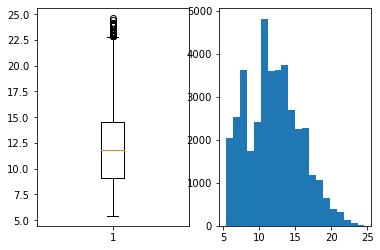

In [17]:
#Checking for outliers

# Interest Rate

fig, axs = plt.subplots(1,2)
axs[0].boxplot(df2.int_rate)


axs[1].hist(df2.int_rate, bins = 20)
plt.show()

In [18]:
df2.int_rate.describe()

count    39131.000000
mean        11.999618
std          3.715843
min          5.420000
25%          9.070000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

As we review the Int Rate, Loan Amount etc - they 
act as primary fields which are important in determining the outcome, so we will continue to retain rest of the data as is

# **Data Analysis**

Target Column = "loan_status" -> This is the column on which we will primarily perform our analysis and understand how each of the data points/parameters lead us to make more informed decision on whose application to be approved or rejected.

### Plot - 1

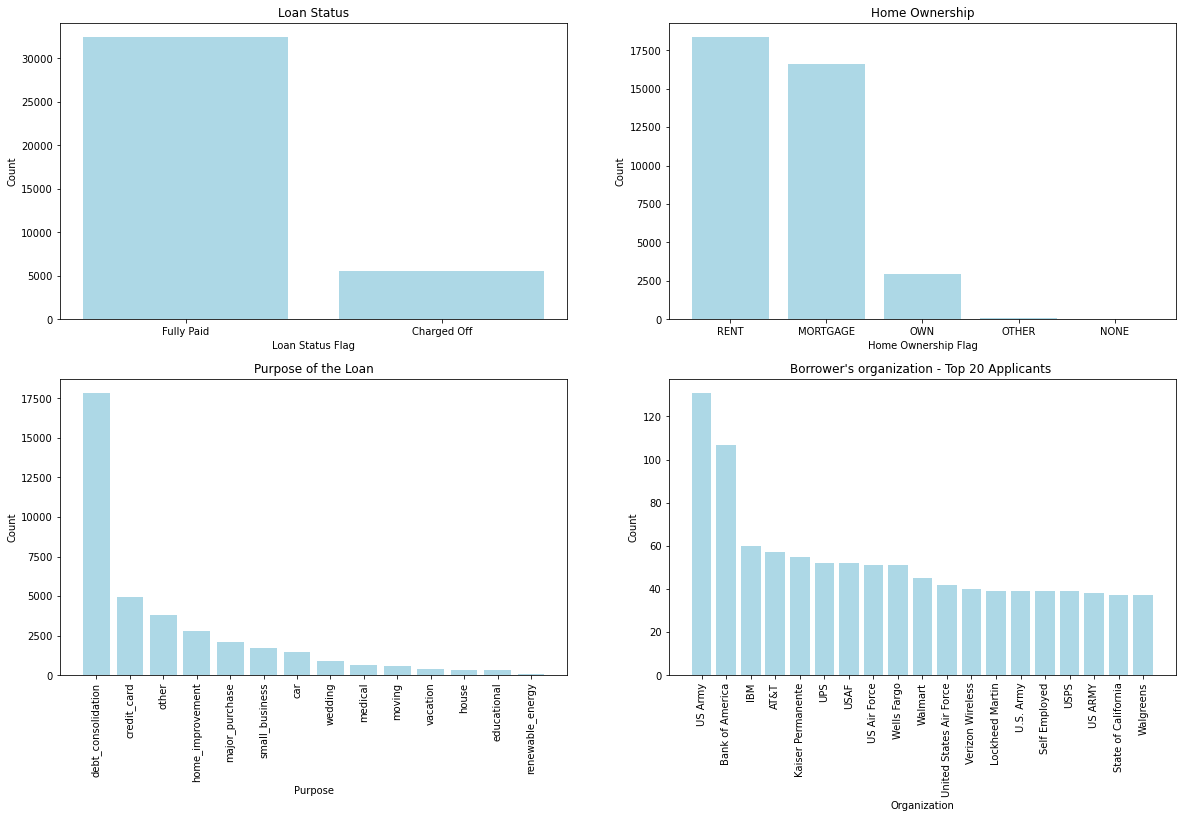

In [19]:
plt.figure(figsize=(20, 12))

df21 = df2[-(df2["loan_status"] == "Current")]
df21_loan_status = dict(df21.loan_status.value_counts())

plt.subplot(2, 2, 1)
plt.bar(df21_loan_status.keys(),df21_loan_status.values(), color ='lightblue')
plt.title("Loan Status")
plt.xlabel("Loan Status Flag")
plt.ylabel("Count")

df21_home_ownership = dict(df21.home_ownership.value_counts())

plt.subplot(2, 2, 2)
plt.bar(df21_home_ownership.keys(),df21_home_ownership.values(), color ='lightblue')
plt.title("Home Ownership")
plt.xlabel("Home Ownership Flag")
plt.ylabel("Count")


df21_purpose = dict(df21.purpose.value_counts())
plt.subplot(2, 2, 3)
plt.bar(df21_purpose.keys(),df21_purpose.values(), color ='lightblue')
plt.title("Purpose of the Loan")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.xticks(rotation = 90)

df21_emp_title = dict(df21.emp_title.value_counts().iloc[0 :20])
del df21_emp_title["missing"]

plt.subplot(2, 2, 4)
plt.bar(df21_emp_title.keys(),df21_emp_title.values(), color ='lightblue')
plt.title("Borrower's organization - Top 20 Applicants ")
plt.xlabel("Organization")
plt.xticks(rotation = 90)
plt.ylabel("Count")


plt.show()


In [20]:
df2.loan_status.value_counts(normalize = True)

Fully Paid     0.829010
Charged Off    0.142266
Current        0.028724
Name: loan_status, dtype: float64

In [21]:
df2.home_ownership.value_counts(normalize = True)

RENT        0.479850
MORTGAGE    0.440469
OWN         0.077151
OTHER       0.002453
NONE        0.000077
Name: home_ownership, dtype: float64

In [22]:
df2.purpose.value_counts(normalize = True)

debt_consolidation    0.470957
credit_card           0.129539
other                 0.100585
home_improvement      0.073190
major_purchase        0.055046
small_business        0.045590
car                   0.039278
wedding               0.023843
medical               0.017301
moving                0.014694
vacation              0.009737
house                 0.009430
educational           0.008254
renewable_energy      0.002556
Name: purpose, dtype: float64

### Observations Plot -1:
    
    1. Charged Off - 14.2% of the total data set
    2. Top two categories of people who apply loan either are in rented house or have mortgaged their home
    3. Top three categories of the purpose of applying loan - Debt Consolidation , Credit Card and Others
    4. Top three work organization declared by barowers are - US Army, Bank of America, IBM

### Plot - 2

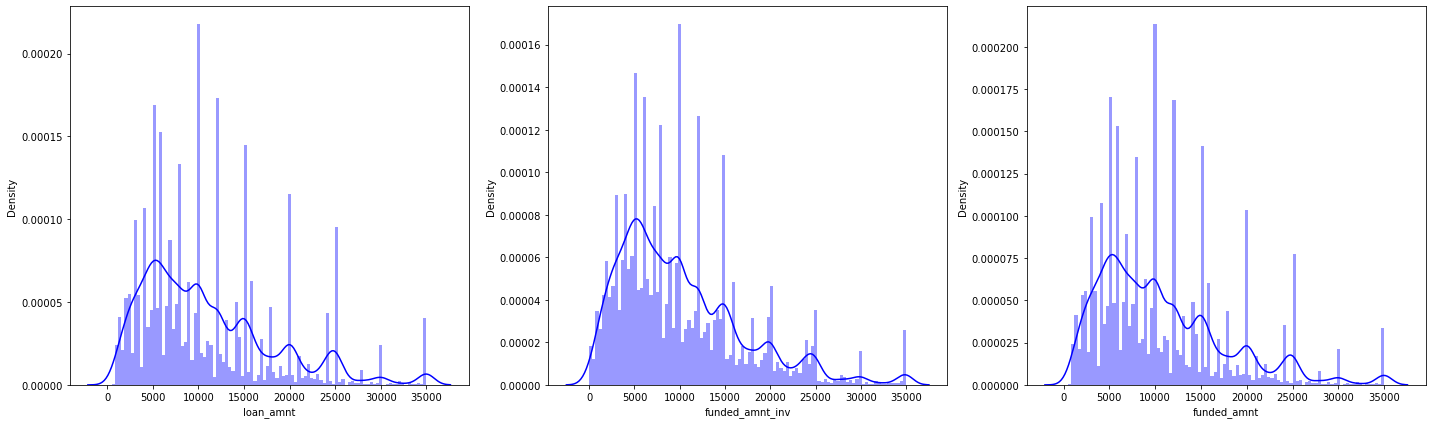

In [23]:

plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
sns.distplot(df21.loan_amnt, bins = 100, color = 'blue')
plt.tight_layout()

plt.subplot(1, 3, 2)
sns.distplot(df21.funded_amnt_inv, bins = 100, color = 'blue')
plt.tight_layout()

plt.subplot(1, 3, 3)
sns.distplot(df21.funded_amnt, bins = 100, color = 'blue')
plt.tight_layout()

plt.show()

### Observation Plot - 2:
    1. We see high degree of correlation between Loan Amount, Funded Amount and Funded Amount invested
    2. We use Loan Amount as a base for the exercise

In [24]:
df21.drop(["funded_amnt_inv", "funded_amnt"], axis = 1, inplace = True)

### Plot - 3

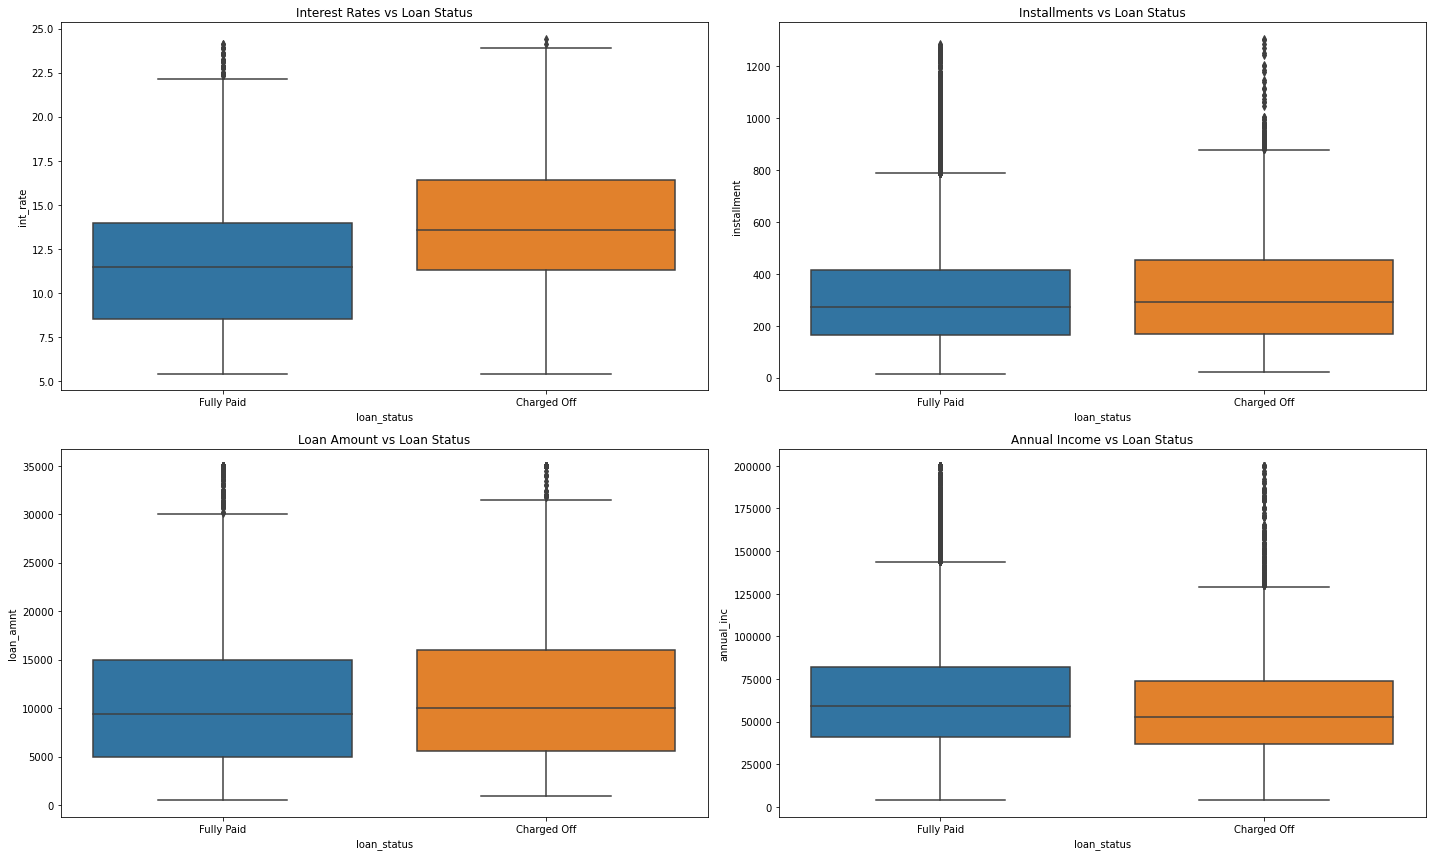

In [25]:
plt.figure(figsize=(20,12))

plt.subplot(2, 2, 1)
sns.boxplot(data = df21, x = df21.loan_status, y = df21.int_rate)
plt.title("Interest Rates vs Loan Status")
plt.tight_layout()


plt.subplot(2, 2, 2)
sns.boxplot(data=df21,x= df21.loan_status,y = df21.installment)
plt.title("Installments vs Loan Status")
plt.tight_layout()

plt.subplot(2, 2, 3)
sns.boxplot(data=df21,x= df21.loan_status,y = df21.loan_amnt)
plt.title("Loan Amount vs Loan Status")
plt.tight_layout()


plt.subplot(2, 2, 4)
sns.boxplot(data=df21,x= df21.loan_status,y = df21.annual_inc)
plt.title("Annual Income vs Loan Status")
plt.tight_layout()

plt.show()

### Observation Plot - 3:

  1. We can observe that, the interest rates for the charged off population is comparatively more than the once paid fully
  2. We can see that the charged off category has a slightly higher median in comparison to Fully Paid and we can also observe that the IQR for the Charged Off is greater.
  3. While the median of installments chosen by the Fully Paid and Charged Off are close, we do see a significant number of people who are charged off to be on likely to request for longer duration to pay off.
  4. There is a clear indication that the people who have been charged off have lesser income in comparison to the Full Paid.
  
  Take Away:
  
  If we look at the above points together, we can say that - Installments and Loan amount to be looked alongside the Income, might give us a fair statistical point in whether to approve or reject.

### Plot - 4

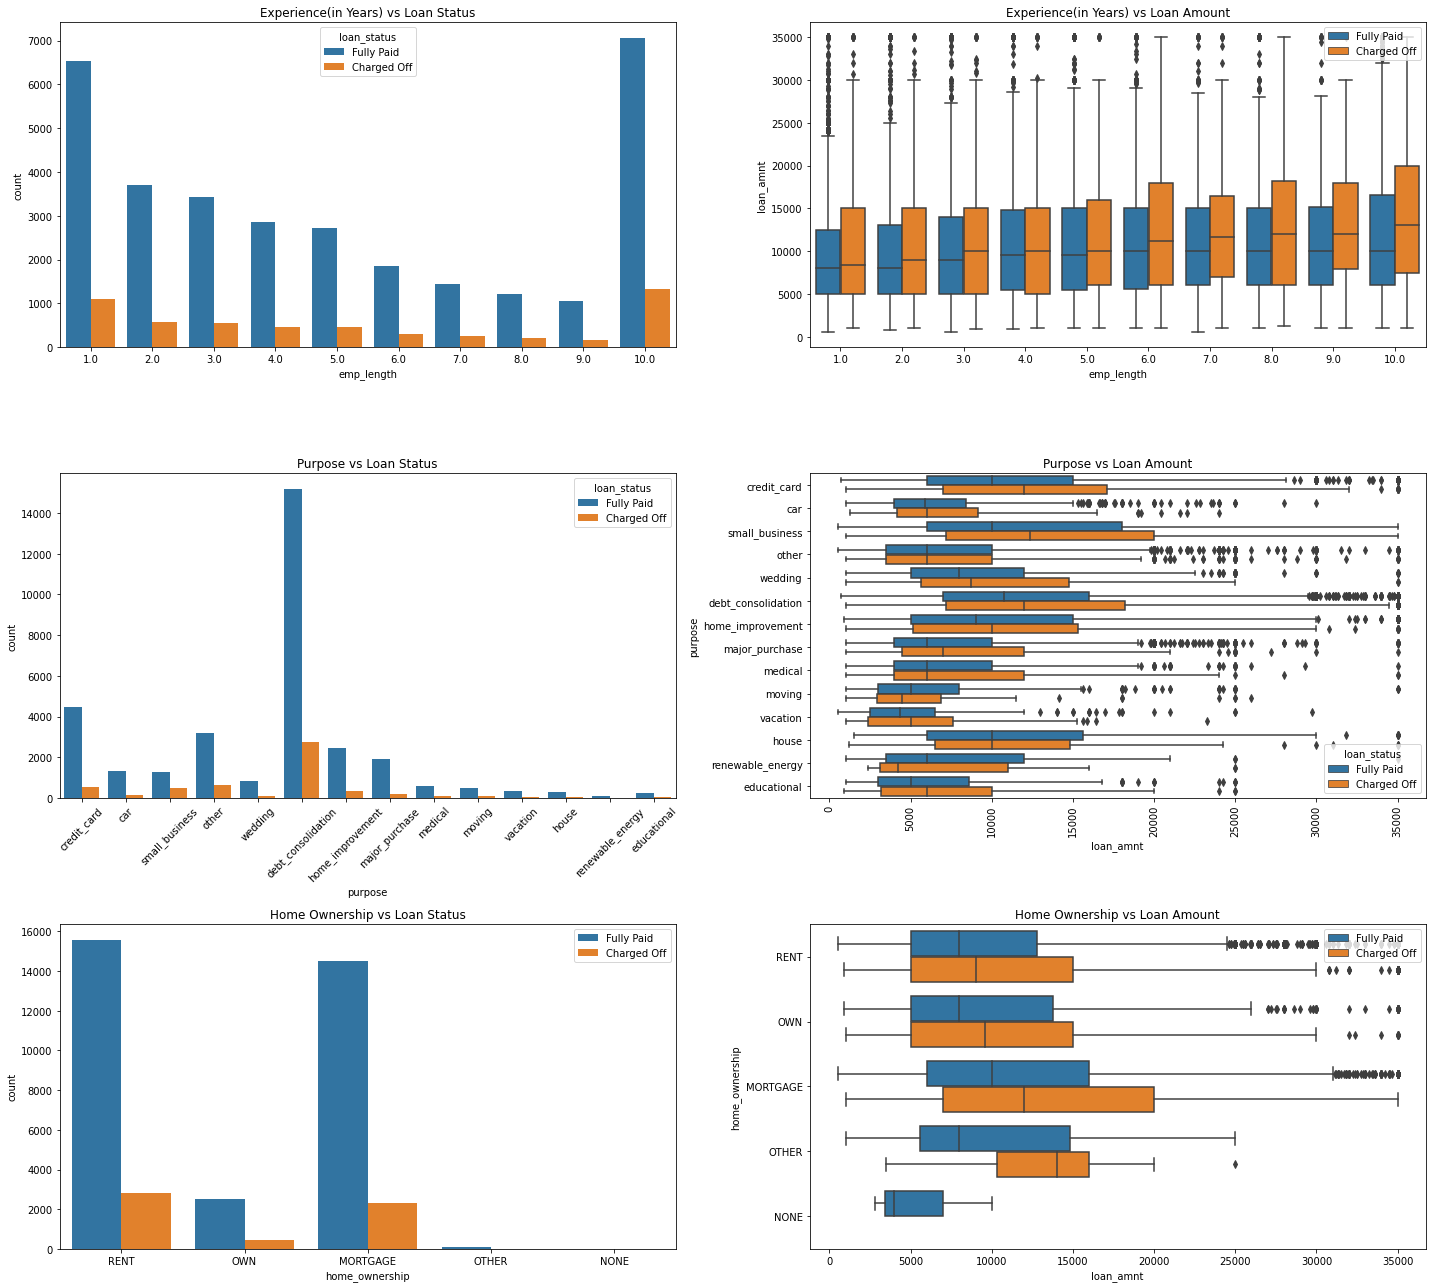

In [ ]:

plt.figure(figsize=(20,18))

plt.subplot(3, 2, 1)
sns.countplot(data = df21, x = df21.emp_length, hue = df21.loan_status)
plt.title("Experience(in Years) vs Loan Status")
plt.tight_layout()

plt.subplot(3, 2, 2)
sns.boxplot(data = df21, y = df21.loan_amnt, x = df21.emp_length, hue = df21.loan_status)
plt.title("Experience(in Years) vs Loan Amount")
plt.legend(loc = "upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.subplot(3, 2, 3)
sns.countplot(data = df21, x = df21.purpose, hue = df21.loan_status)
plt.xticks(rotation = 45)
plt.title("Purpose vs Loan Status")
plt.tight_layout()

plt.subplot(3, 2, 4)
sns.boxplot(data = df21, x = df21.loan_amnt, y = df21.purpose, hue = df21.loan_status)
plt.xticks(rotation = 90)
plt.title("Purpose vs Loan Amount")


plt.subplot(3, 2, 5)
sns.countplot(data = df21, x = df21.home_ownership, hue = df21.loan_status)
plt.title("Home Ownership vs Loan Status")
plt.legend(loc = "upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.subplot(3, 2, 6)
sns.boxplot(data = df21, x = df21.loan_amnt, y = df21.home_ownership, hue = df21.loan_status)
plt.title("Home Ownership vs Loan Amount")
plt.legend(loc = "upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

### Observation Plot- 4:

  1. Number of people who have applied for loan are at the two extreams of the spectrum - Less than 1 Year or 10 Years and more.
  2. We can see a trend for people with experience above 6 years wherein the people who have been marked as charged Off have taken loan amount - greater by terms of Median, IQR and Max value in comparision to the Fully Paid category.
  3. In comparison to the top 3 categories of loan purpose, we see an evident trend in Credit Card, Small Business, Debt Consolidation which are greater by terms of Median, IQR and Max value in comparision to the Fully Paid category.
  4. In comparison to the top 3 categories of Home Ownership, we can see a trend between Rent, Own and Mortgage which show significantly higher Median, IQR and Max value in comparision to the Fully Paid category. In "Others" category - there is a strong indicator of loan amount of Charged Off people whose 25th Quartile, Median and 75th Quartile are all significantly greater than Fully Paid.
  
  Take Away:
  
  1. Any loan where borrower experience greater than 6 years, can be viewed in combination with Home Ownership and Purpose inorder to determine whether it would be appropriate to approve.
  

### Plot - 5

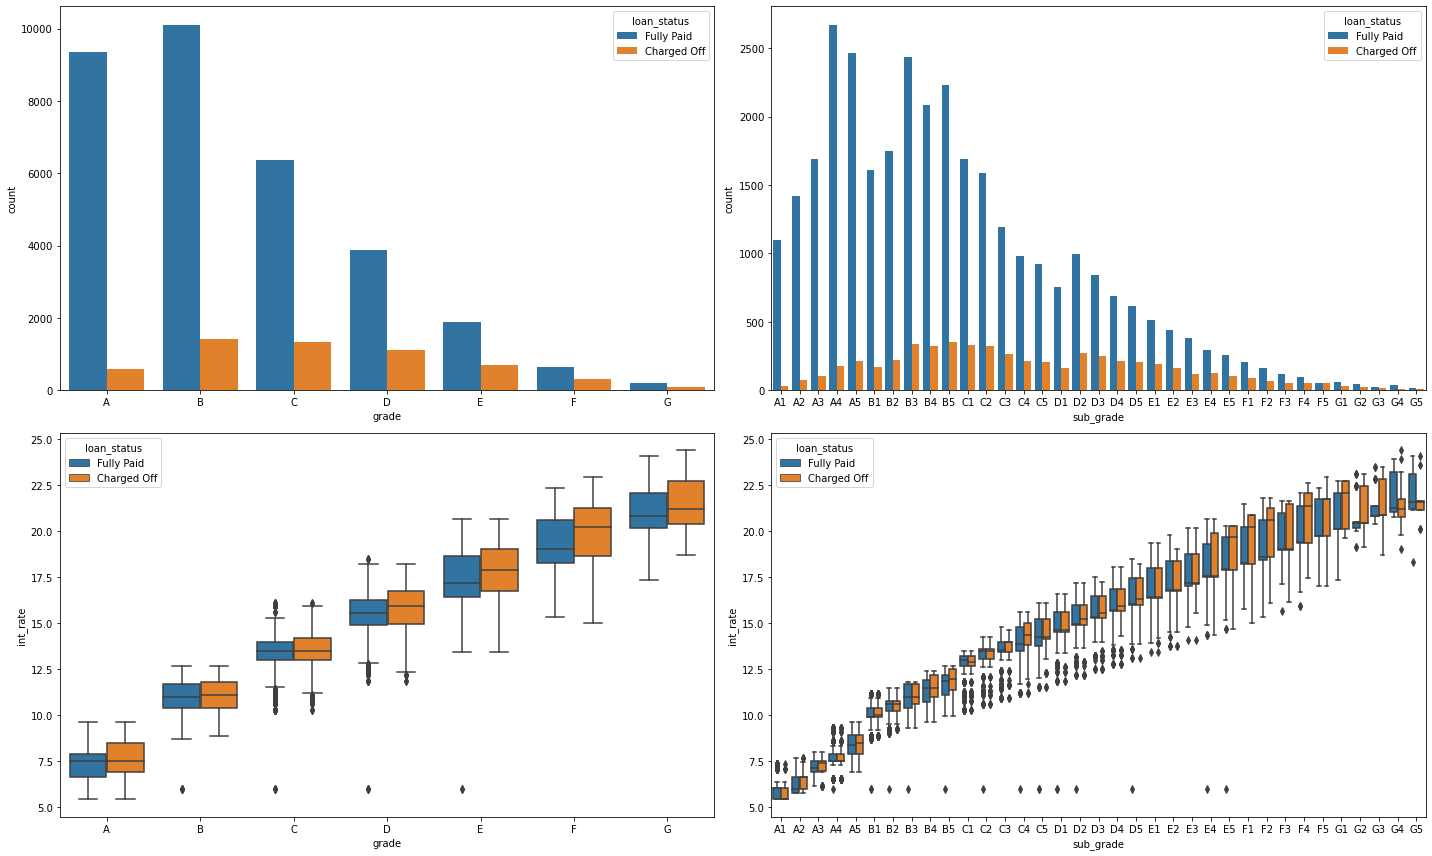

In [73]:
plt.figure(figsize=(20,12))

df_grade = sorted(list(set(df21.grade)))
df_sub_grade = sorted(list(set(df21.sub_grade)))

plt.subplot(2, 2, 1)
sns.countplot(data = df21, x = df21.grade, hue = df21.loan_status, order = df_grade)
plt.tight_layout()

plt.subplot(2, 2, 2)
sns.countplot(data = df21, x = df21.sub_grade, hue = df21.loan_status, order = df_sub_grade)
plt.tight_layout()

plt.subplot(2, 2, 3)
sns.boxplot(data = df21, y = df21.int_rate, x = df21.grade, hue = df21.loan_status, order = df_grade)
plt.tight_layout()

plt.subplot(2, 2, 4)
sns.boxplot(data = df21, y = df21.int_rate, x = df21.sub_grade, hue = df21.loan_status, order = df_sub_grade)
plt.tight_layout()

plt.show()

### Observation Plot - 5:

  1. We see clear increase in the proportion of Charged Off category in comparision to Fully Paid under Grades C to G - Subgroups C3 to G5
  2. There is high degree of correlation between rate of interest and Grades/Sub Grades. As the grades moves away alphabetically from A onwards the interest rate increased substantially.
  
  Take Away
  
  1. Any one who is falling under Grades/Sub Grade category C onwards to G, are more likely to be Charged Off than A, B
  

### Plot - 6

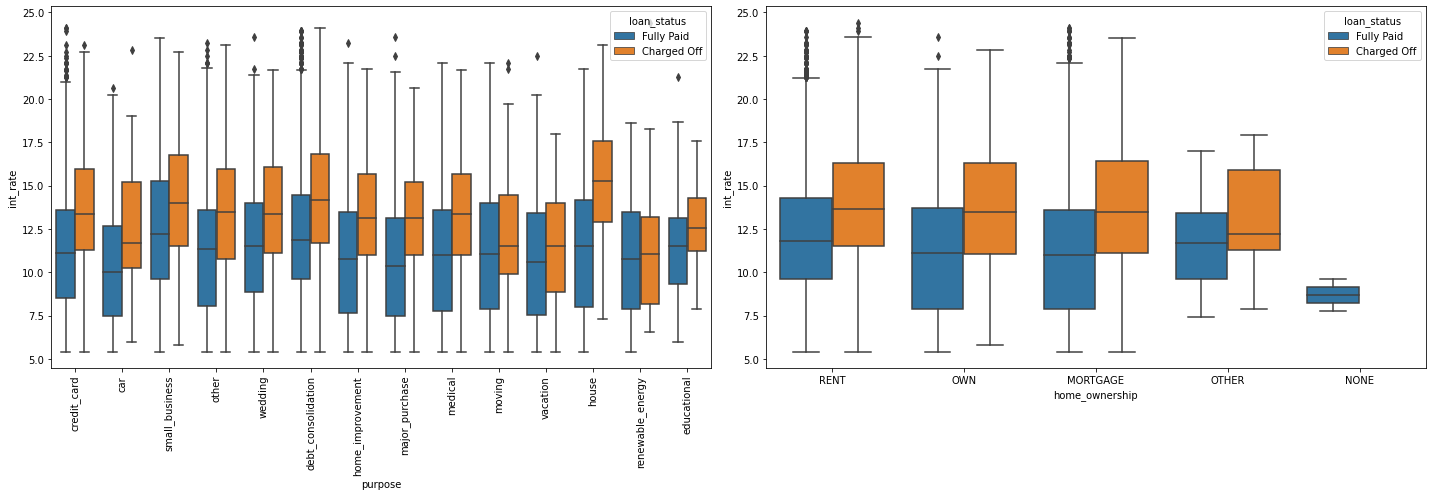

In [74]:
plt.figure(figsize= (20, 7))

plt.subplot(1, 2, 1)
sns.boxplot(data = df21, y = df21.int_rate, x = df21.purpose, hue = df21.loan_status)
plt.xticks(rotation = 90)
plt.tight_layout()


plt.subplot(1, 2, 2)
sns.boxplot(data = df21, y = df21.int_rate, x = df21.home_ownership, hue = df21.loan_status)
plt.tight_layout()

plt.show()


### Observation Plot - 6:
  
  1. Median interest rates for the purpose outlined are significantly greater and in some cases closer to 75th percentile
    which indicated that the charged off category under purpose were paying far greater interest rate in comaprision to Fully
    Paid.
  2. Across the Home Ownership category, we see that the people who have been charged Off have paid significantly higher
interest rates and closer to 75th percentile in comparision to Fully Paid.

Take Away

1. Higher interest rates are common feature and especially in few segments, the median of charged off to be closer to the 75th
percentile of the Fully Paid is an alarm to be observed for.

### Plot - 7

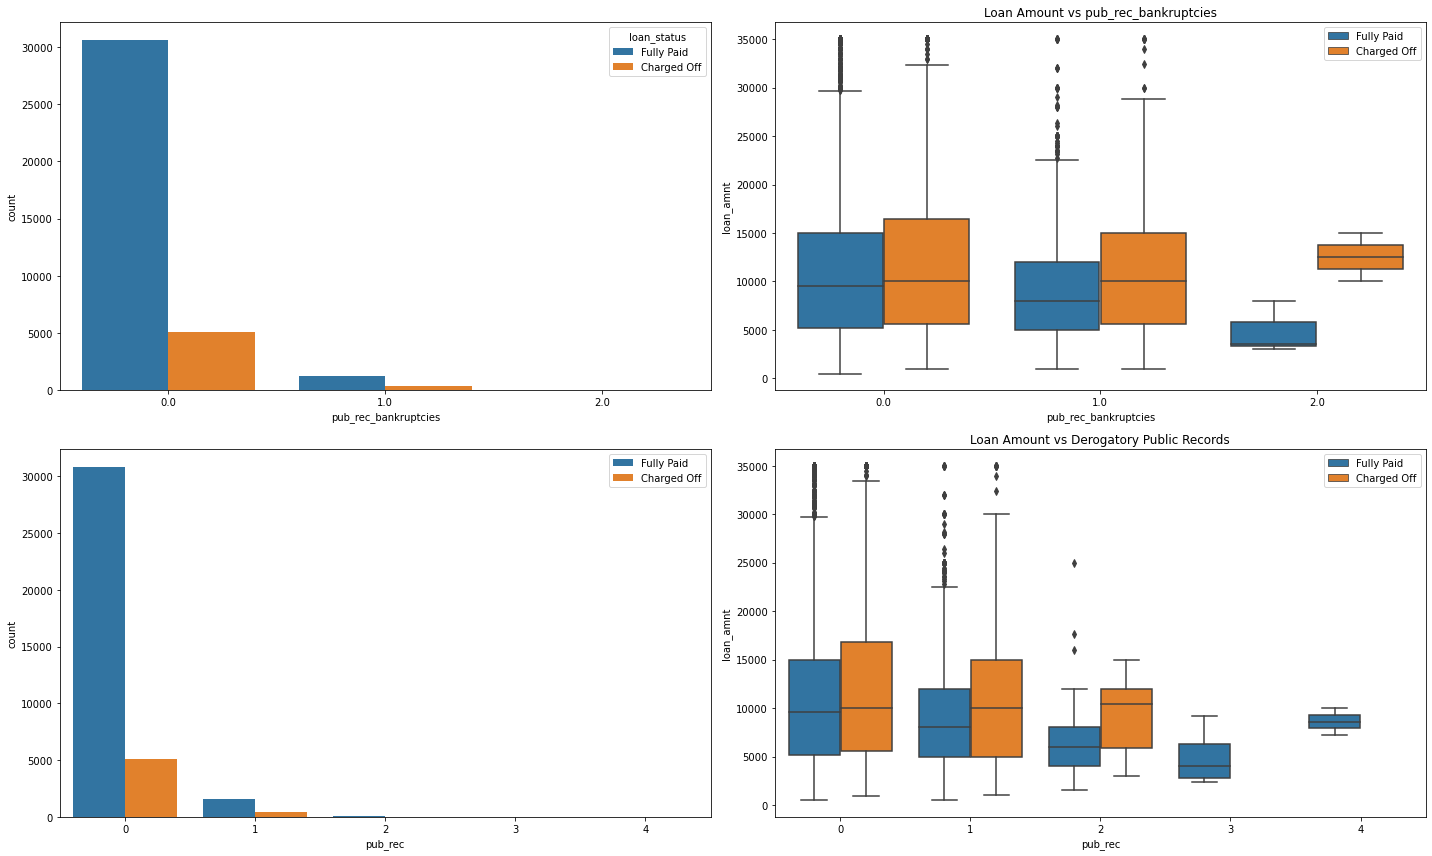

In [75]:
plt.figure(figsize=(20,12))

plt.subplot(2, 2, 1)
sns.countplot(data = df21, x = df21.pub_rec_bankruptcies, hue = df21.loan_status)
plt.tight_layout()

plt.subplot(2, 2, 2)
sns.boxplot(data = df21, y = df21.loan_amnt, x = df21.pub_rec_bankruptcies, hue = df21.loan_status)
plt.title("Loan Amount vs pub_rec_bankruptcies")
plt.legend(loc = "upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()


plt.subplot(2, 2, 3)
sns.countplot(data = df21, x = df21.pub_rec, hue = df21.loan_status)
plt.legend(loc = "upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()


plt.subplot(2, 2, 4)
sns.boxplot(data = df21, y = df21.loan_amnt, x = df21.pub_rec, hue = df21.loan_status)
plt.title("Loan Amount vs Derogatory Public Records")
plt.legend(loc = "upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

### Observation Plot - 7:
    
    1. We see greater proportaion under public record bankruptcies for "1.0" 
    2. We see greater proportaion under Deregatory public record for "1.0"

In [76]:
df21["revol_util_cut"] = pd.cut(df21.revol_util, bins = 10, labels = ["Revol1", "Revol2", "Revol3", "Revol4", "Revol5", "Revol6", "Revol7", "Revol8", "Revol9", "Revol10"])

df21["dti_cut"] = pd.cut(df21.dti, bins = 10, labels = ["dti1", "dti2", "dti3", "dti4", "dti5", "dti6", "dti7", "dti8", "dti9", "dti10"])

df21["revol_bal_cut"] = pd.cut(df21.revol_bal, bins = 10, labels = ["Revolb1", "Revolb2", "Revolb3", "Revolb4", "Revolb5", "Revolb6", "Revolb7", "Revolb8", "Revolb9", "Revolb10"])

### Plot - 8

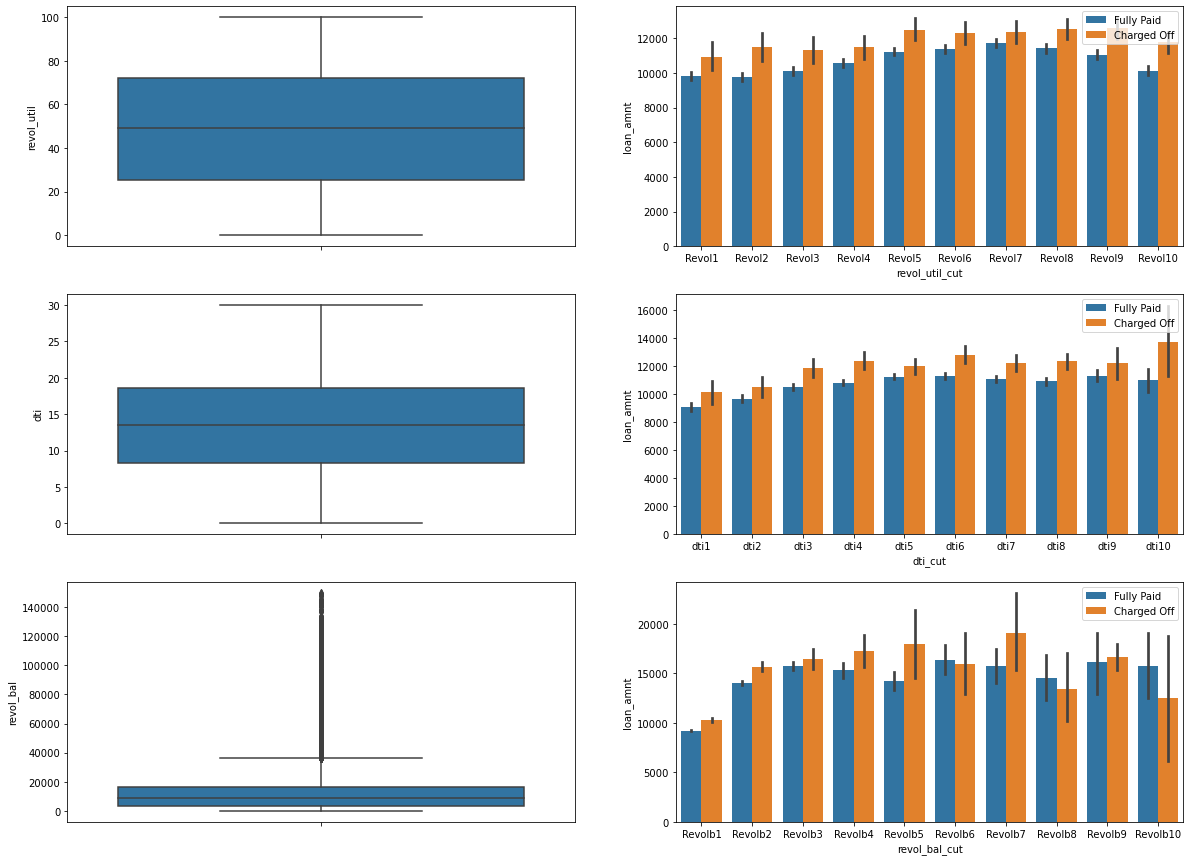

In [78]:
plt.figure(figsize=(20,15))

plt.subplot(3, 2, 1)
sns.boxplot(data = df21, hue = df21.loan_status, y = df21.revol_util)
plt.tight_layout

plt.subplot(3, 2, 2)
sns.barplot(data = df21, hue = df21.loan_status, y = df21.loan_amnt, x = df21.revol_util_cut)
plt.tight_layout
plt.legend(loc = "upper right",bbox_to_anchor=(1,1))

plt.subplot(3, 2, 3)
sns.boxplot(data = df21, hue = df21.loan_status, y = df21.dti)
plt.tight_layout

plt.subplot(3, 2, 4)
sns.barplot(data = df21, hue = df21.loan_status, y = df21.loan_amnt, x = df21.dti_cut)
plt.tight_layout
plt.legend(loc = "upper right",bbox_to_anchor=(1,1))

plt.subplot(3, 2, 5)
sns.boxplot(data = df21, hue = df21.loan_status, y = df21.revol_bal)
plt.tight_layout

plt.subplot(3,2,6)
sns.barplot(data = df21, hue = df21.loan_status, y = df21.loan_amnt, x = df21.revol_bal_cut)
plt.tight_layout
plt.legend(loc = "upper right",bbox_to_anchor=(1,1))

plt.show()

### Plot - 9

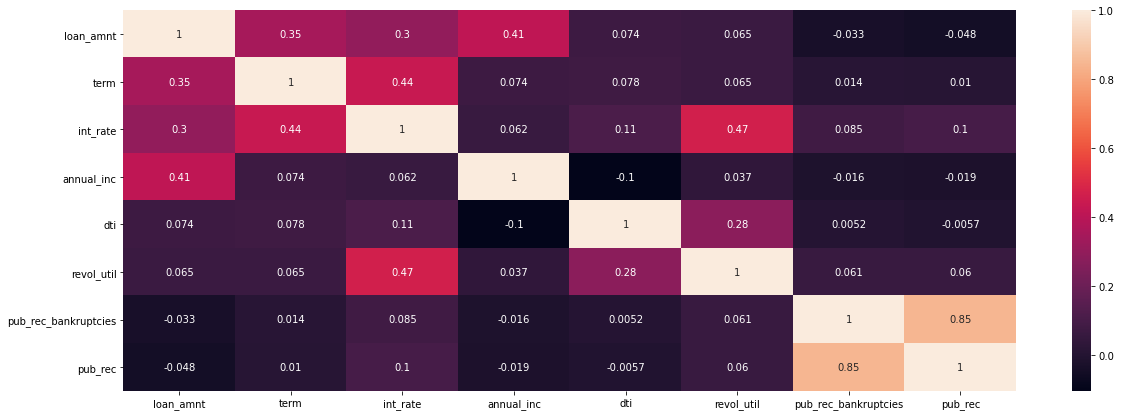

In [82]:
df21_numeric_imp = df21[["loan_amnt","term","int_rate","annual_inc","dti","revol_util","pub_rec_bankruptcies", "pub_rec"]]
plt.figure(figsize = (20,7))
sns.heatmap(data = df21_numeric_imp.corr(), annot = True)
plt.tight_layout
plt.show()

In [79]:
df21["int_rate_cut"] = pd.cut(df21.int_rate, bins = 10, labels = ["int1", "int2", "int3", "int4", "int5", "int6", "int7", "int8", "int9", "int10"])
df21["installment_cut"] = pd.cut(df21.installment, bins = 10, labels = ["inta1", "inta2", "inta3", "inta4", "inta5", "inta6", "inta7", "inta8", "inta9", "inta10"])
df21["annual_inc_cut"] = pd.cut(df21.annual_inc, bins = 10,  labels = ["inc1", "inc2", "inc3", "inc4", "inc5", "inc6", "inc7", "inc8", "inc9", "inc10"])

In [80]:
#Set1 - Home Ownership

df21_set1 = pd.pivot_table(data = df21, index = "home_ownership", columns= "loan_status", values= "loan_amnt", aggfunc= "count" )
df21_set1_prop = df21_set1[["Charged Off",	"Fully Paid"]].apply(lambda x : x/x.sum(), axis=1)

#Set2 - Annual Income

df21_set2 = pd.pivot_table(data = df21, index = "annual_inc_cut", columns= "loan_status", values= "loan_amnt", aggfunc= "count" )
df21_set2_prop = df21_set2[["Charged Off","Fully Paid"]].apply(lambda x : x/x.sum(), axis=1)

#Set3 - Grade

df21_set3 = pd.pivot_table(data = df21, index = "grade", columns= "loan_status", values= "loan_amnt", aggfunc= "count" )
df21_set3_prop = df21_set3[["Charged Off","Fully Paid"]].apply(lambda x : x/x.sum(), axis=1)

#Set4 - Sub-Grade

df21_set4 = pd.pivot_table(data = df21, index = "sub_grade", columns= "loan_status", values= "loan_amnt", aggfunc= "count" )
df21_set4_prop = df21_set4[["Charged Off","Fully Paid"]].apply(lambda x : x/x.sum(), axis=1)

#Set5 - Purpose

df21_set5 = pd.pivot_table(data = df21, index = "purpose", columns= "loan_status", values= "loan_amnt", aggfunc= "count" )
df21_set5_prop = df21_set5[["Charged Off","Fully Paid"]].apply(lambda x : x/x.sum(), axis=1)

#Set6 - Term

df21_set6 = pd.pivot_table(data = df21, index = "term", columns= "loan_status", values= "loan_amnt", aggfunc= "count" )
df21_set6_prop = df21_set6[["Charged Off","Fully Paid"]].apply(lambda x : x/x.sum(), axis=1)

#Set7 - DTI-Cut

df21_set7 = pd.pivot_table(data = df21, index = "dti_cut", columns= "loan_status", values= "loan_amnt", aggfunc= "count" )
df21_set7_prop = df21_set7[["Charged Off","Fully Paid"]].apply(lambda x : x/x.sum(), axis=1)

#Set8 - Dero-Pub-Cut

df21_set8 = pd.pivot_table(data = df21, index = "pub_rec", columns= "loan_status", values= "loan_amnt", aggfunc= "count" )
df21_set8_prop = df21_set8[["Charged Off","Fully Paid"]].apply(lambda x : x/x.sum(), axis=1)

#Set9 - Int_rate-Cut

df21_set9 = pd.pivot_table(data = df21, index = "int_rate_cut", columns= "loan_status", values= "loan_amnt", aggfunc= "count" )
df21_set9_prop = df21_set9[["Charged Off","Fully Paid"]].apply(lambda x : x/x.sum(), axis=1)

### Plot - 10

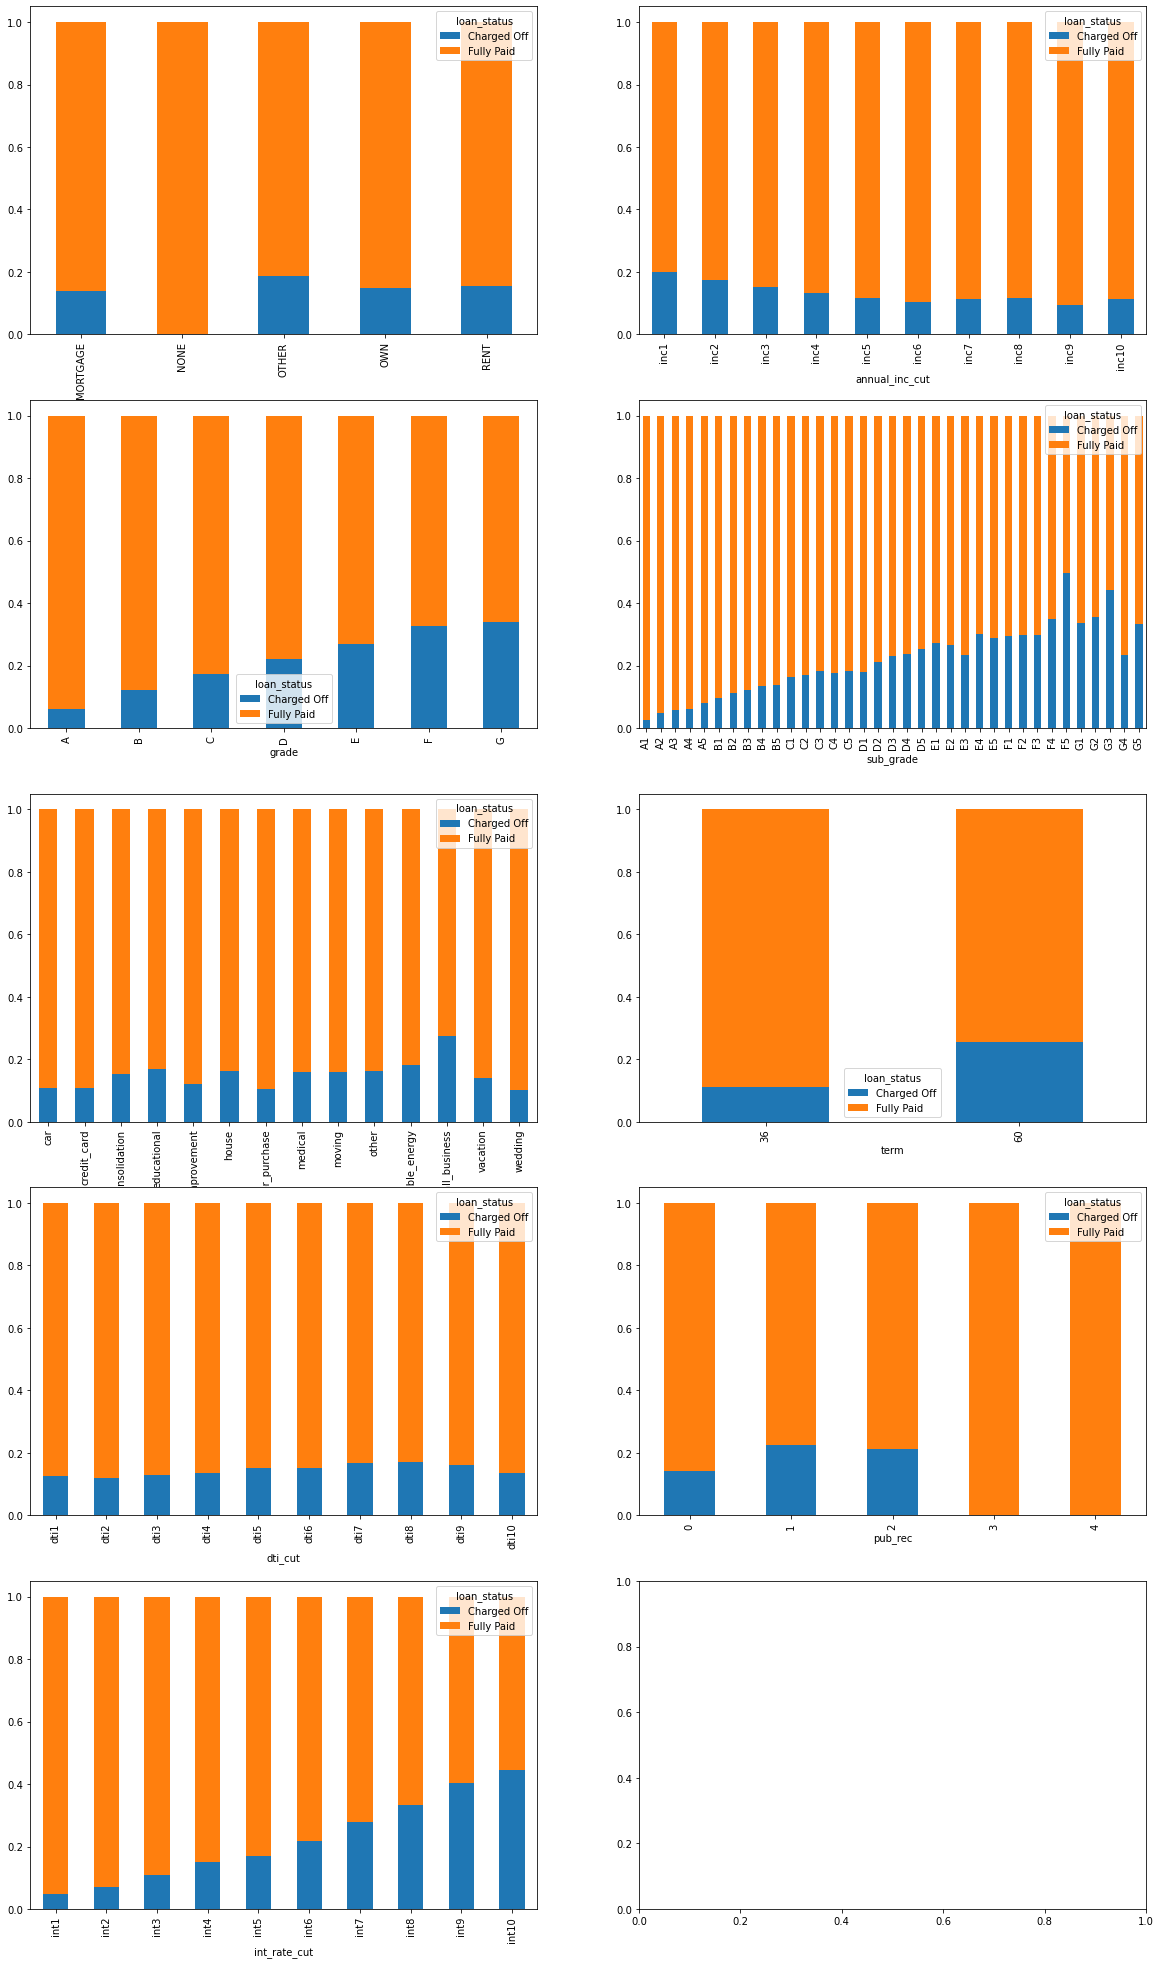

In [85]:
fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize = (20,35))

df21_set1_prop.plot(kind = "bar", stacked = True, ax = ax[0][0])
plt.tight_layout

df21_set2_prop.plot(kind = "bar", stacked = True, ax = ax[0][1])
plt.tight_layout

df21_set3_prop.plot(kind = "bar", stacked = True, ax = ax[1][0])
plt.tight_layout

df21_set4_prop.plot(kind = "bar", stacked = True, ax = ax[1][1])
plt.tight_layout

df21_set5_prop.plot(kind = "bar", stacked = True, ax = ax[2][0])
plt.tight_layout

df21_set6_prop.plot(kind = "bar", stacked = True, ax = ax[2][1])
plt.tight_layout

df21_set7_prop.plot(kind = "bar", stacked = True, ax = ax[3][0])
plt.tight_layout

df21_set8_prop.plot(kind = "bar", stacked = True, ax = ax[3][1])
plt.tight_layout

df21_set9_prop.plot(kind = "bar", stacked = True, ax = ax[4][0])
plt.tight_layout

plt.show()

### Key Observationsfor Charged Off - Plot - 10:

 1. Home Ownership -  Proportion of Charged Off is greater Other and followed by Mortgage, Own and Rent 
 2. Annual Income - Proportion of Charged Off is highest in the first 3 buckets (upper limit of 200000 has been broken down into 10 bins of equal proportion)
 3. Grades & Sub-Grades - Proportion of Charged Off is increasingly greater as we moved from C to G.
 4. Purpose - Small business, Renewable, Educations show greater proportion of Charged Off
 5. Term -  Term of 60 months have greater proportion of Charged Off
 6. Int Rate - We see an incremental raise in interest rates and as they are higher, we see a clear correlation wherein the
 proportion of Charged Off significantly increases

 

In [86]:
#lets filter the data basis the Grade Column and deep dive into understanding the dataset better.
values = ["E", "F", "G"]

df21_grade_data = df21[df21["grade"].isin(values)]

val = ["Charged Off"] 

df21_grade_co_data = df21[df21["loan_status"].isin(val)]
df21_grade_co_data_1 = df21_grade_co_data[["loan_amnt", "term", "int_rate", "installment", "emp_length", "annual_inc", "dti", "pub_rec", "revol_util", "revol_bal", "pub_rec_bankruptcies"]]

### Plot - 11

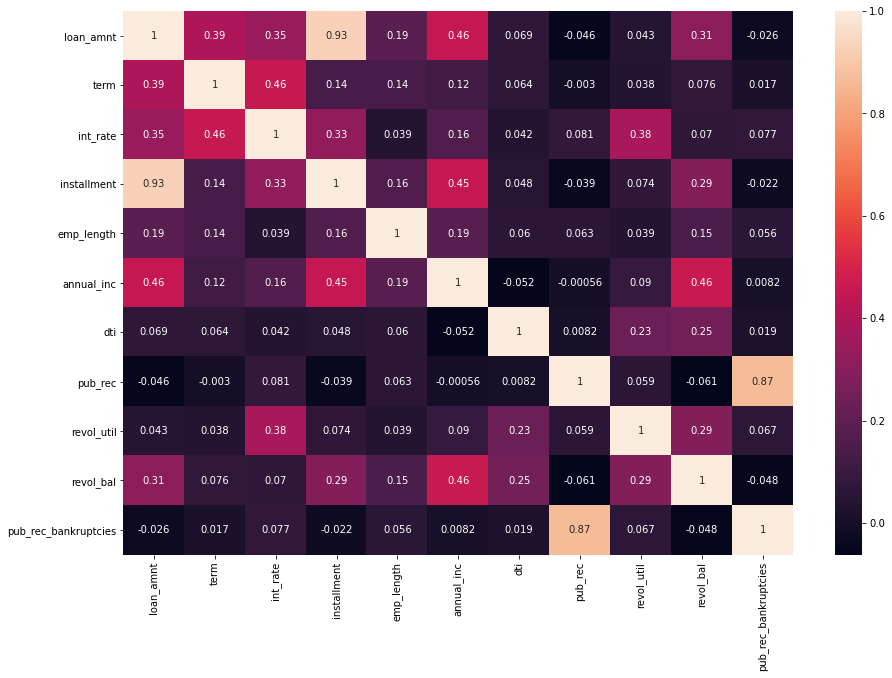

In [87]:
plt.figure(figsize = (15,10))
sns.heatmap(df21_grade_co_data_1.corr(), annot = True)
plt.show()